# Análise de Dados das Ocorrências Aeronáuticas na Aviação Civil Brasileira
Dados das ocorrências aeronáuticas da aviação civil brasileira no período de 2012 a 2021



---
# ACIDENTES AÉREOS, POR QUE OCORREM?


---



![voo](https://www.schmidt-gevelsberg.com/wp-content/uploads/sites/16/Schmidt-Gevelsberg_Luftfracht-862x450.jpg)







Voar sempre encantou e desafiou o homem. A aviação é uma atividade complexa que envolve diversos agentes, onde a quebra de elos da corrente pode desencadear acidentes. Mesmo assim quando comparado com outros meios de transporte, representa um dos meios mais seguros. Mas porque ocorrem os acidentes?





---
# OBJETIVO


---




O objetivo desta análise é explorar a base de dados de Ocorrências Aeronauticas na Aviação Civil Brasileira para encontrar alguns insights sobre a natureza dos acidentes ocorridos no Brasil nos últimos 10 anos. 


### Tabelas disponíveis no banco de dados
* OCORRÊNCIA - Informações sobre as ocorrências.
* OCORRÊNCIA_TIPO - Informações sobre o tipo de ocorrência.
* AERONAVE - Informações sobre as aeronaves envolvidas nas ocorrências.
* FATOR_CONTRIBUINTE - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
* RECOMENDAÇÃO - Informações sobre as recomendações de segurança geradas nas ocorrências.



---
# Bibliotecas


---



Para realizar a análise, importou-se as biblioteca pandas, numpy, matplot e seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



---
# Análise da Tabela Ocorrências



---




Incialmente foi realizada a análise exploratória da tabela de ocorrências. Como a base já tinha sido visualizada anteriormente, extraiu-se algumas selecionou-se as colunas para extração dos dados

### Dicionário dos dados


- **codigo_ocorrencia:** código da ocorrência
- **ocorrencia_classificacao:** classificação da ocorrência. (incidente/incidente grave/ acidente)
- **ocorrencia_latitude:** latitude da ocorrência
- **ocorrencia_longitude:** longitude da ocorrência
- **ocorrencia_cidade:** cidade da ocorrência
- **ocorrencia_uf:** unidade Federativa da ocorrência
- **ocorrencia_pais:** país da ocorrência
- **ocorrencia_aerodromo:** aerodrômo da ocorrência
- **ocorrencia_dia:** data da ocorrência
- **ocorrencia_hora:** hora da ocorrência
- **investigacao_aeronave_liberada:** liberação ou não da aeronave após a investigação
- **investigacao_status:** status da investigação
- **divulgacao_relatorio_numero:** código do relatório de investigação
- **divulgacao_relatorio_publicado:** informa se o relatório foi publicado ou não
- **divulgacao_dia_publicacao:** data da divulgação do relatório caso
- **total_recomendacoes:** número de recomendações
- **total_aeronaves_envolvidas:** número de aeronaves envolvidas
- **ocorrencia_saida_pista:** se na ocorrência a aeronave saiu da pista

## Preparação dos dados


---



In [ ]:
# Baixando o dataset ocorrencia
url = 'http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv'
oc0 = pd.read_csv(url,delimiter=';')
oc0.head()


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,05/01/2012,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,...,06/01/2012,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,...,06/01/2012,17:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,...,06/01/2012,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO


In [ ]:
# visualizando as colunas do dataset para seleção das colunas a serem usadas
oc0.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista'],
      dtype='object')

In [ ]:
# extração das colunas do dataset
oc0 = oc0[['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_cidade','ocorrencia_uf','ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_status', 'total_recomendacoes', 'total_aeronaves_envolvidas']]

In [ ]:
# configuração da coluna ocorrencia_dia e extração do ano
oc0['ocorrencia_dia'] = pd.to_datetime(oc0['ocorrencia_dia'], format="%d/%m/%Y")
oc0['ocorrencia_ano'] = oc0['ocorrencia_dia'].dt.year

In [ ]:
#visualização do dataframe

print(f"O dataset possui {oc0.shape[0]} linhas e {oc0.shape[1]} colunas")
oc0.head()

O dataset possui 5167 linhas e 15 colunas


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_ano
0,52242,52242,52242,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,FINALIZADA,0,1,2012
1,45331,45331,45331,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,FINALIZADA,3,1,2012
2,45333,45333,45333,45333,45333,ACIDENTE,VIAMÃO,RS,****,2012-01-06,13:00:00,FINALIZADA,0,1,2012
3,45401,45401,45401,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,****,2012-01-06,17:00:00,NaN,0,1,2012
4,45407,45407,45407,45407,45407,ACIDENTE,SÃO SEPÉ,RS,****,2012-01-06,16:30:00,FINALIZADA,0,1,2012


Verificando dados faltantes

In [ ]:
#verificando dados faltantes
oc0.isnull().sum().sort_values(ascending=False)[:10]

investigacao_status         257
ocorrencia_hora               1
codigo_ocorrencia             0
codigo_ocorrencia1            0
codigo_ocorrencia2            0
codigo_ocorrencia3            0
codigo_ocorrencia4            0
ocorrencia_classificacao      0
ocorrencia_cidade             0
ocorrencia_uf                 0
dtype: int64

In [ ]:
oc0['investigacao_status'].unique()

array(['FINALIZADA', nan, 'ATIVA'], dtype=object)

In [ ]:
oc0['investigacao_status'].value_counts()

FINALIZADA    4489
ATIVA          421
Name: investigacao_status, dtype: int64

Após verificar os dados faltantes, optou-se por não excluir as linhas e substituir por indeterminado em investigação_status.

In [ ]:
oc0['investigacao_status'] = oc0['investigacao_status'].fillna('IND')

In [ ]:
oc0['investigacao_status'].value_counts()

FINALIZADA    4489
ATIVA          421
IND            257
Name: investigacao_status, dtype: int64

In [ ]:
#exlui o dado faltante em ocorrencia_hora
oc0.dropna(inplace=True)




## Análise Exploratória de Ocorrencias


---



### Quantos acidentes acontecerem no período?


In [ ]:
#Quantidade de ocorrências por classificação
oc0['ocorrencia_classificacao'].value_counts()

INCIDENTE          2808
ACIDENTE           1667
INCIDENTE GRAVE     691
Name: ocorrencia_classificacao, dtype: int64

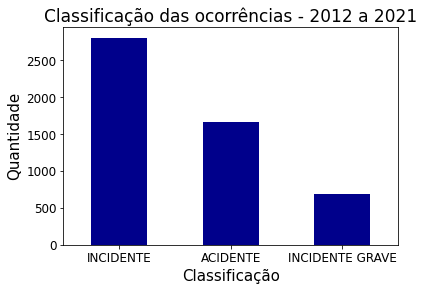

In [ ]:
#Gráfico de barras
oc0['ocorrencia_classificacao'].value_counts().plot.bar(color='darkblue', fontsize=12)

plt.title('Classificação das ocorrências - 2012 a 2021', fontsize=17)
plt.xlabel('Classificação', fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Quantidade', fontsize=15);

### Qual a quantidade de ocorrências por total de aeronaves envolvidas?

In [ ]:
# Quantidade por total de aeronaves envolvidas
oc0['total_aeronaves_envolvidas'].value_counts()

1    5101
2      62
3       3
Name: total_aeronaves_envolvidas, dtype: int64

### Qual a quantidade por status das investigação?

In [ ]:
# Quantidade por status das investigação
oc0['investigacao_status'].value_counts()

FINALIZADA    4488
ATIVA          421
IND            257
Name: investigacao_status, dtype: int64

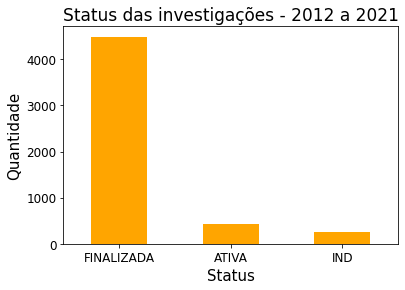

In [ ]:
#Gráfico de barras
oc0['investigacao_status'].value_counts().plot.bar(color='orange', fontsize=12)

plt.title('Status das investigações - 2012 a 2021', fontsize=17)
plt.xlabel('Status', fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Quantidade', fontsize=15);

### As ocorrencias acontecem mais com qual número de aeronaves envolvidas? Qual o status dessas ocorrências?

In [ ]:
pd.crosstab([oc0['ocorrencia_classificacao'],oc0['investigacao_status']], oc0['total_aeronaves_envolvidas'])

total_aeronaves_envolvidas                       1   2  3
ocorrencia_classificacao investigacao_status             
ACIDENTE                 ATIVA                 354   3  0
                         FINALIZADA           1121   6  0
                         IND                   181   2  0
INCIDENTE                ATIVA                   1   1  0
                         FINALIZADA           2770  31  2
                         IND                     3   0  0
INCIDENTE GRAVE          ATIVA                  55   7  0
                         FINALIZADA            547  10  1
                         IND                    69   2  0

### Quais estados tiveram mais ocorrencias?

In [ ]:
# Quantidade por estado
oc0['ocorrencia_uf'].value_counts()

SP     1261
MG      499
PR      431
RJ      402
RS      327
MT      276
GO      268
PA      261
AM      207
BA      183
SC      167
MS      157
DF      106
PE       86
CE       78
ES       73
MA       59
RR       54
AC       49
TO       46
RO       43
PI       38
AL       28
PB       22
RN       17
SE       14
AP       12
***       2
Name: ocorrencia_uf, dtype: int64

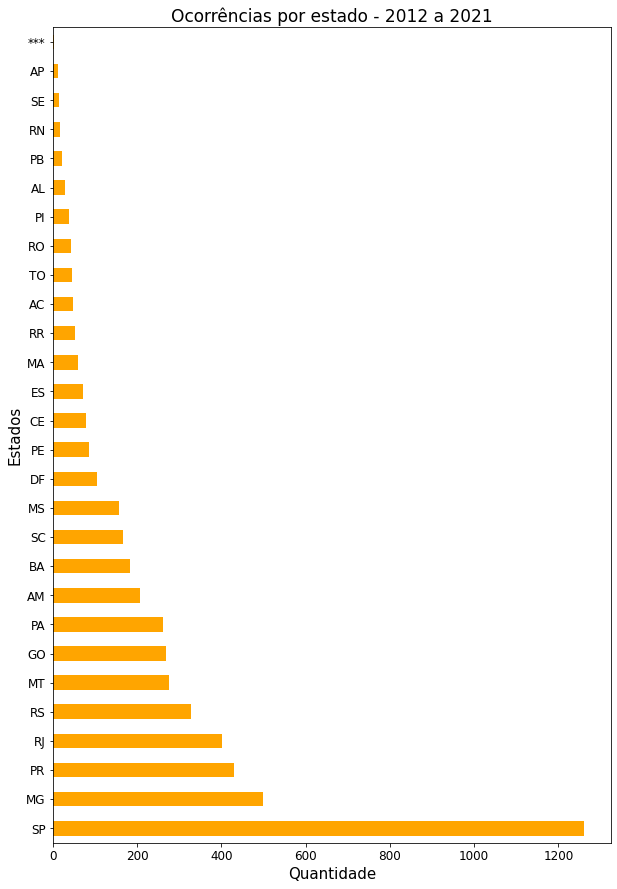

In [ ]:
#Gráfico de barras
oc0['ocorrencia_uf'].value_counts().plot.barh(color='orange', fontsize=12, figsize=(10.,15.))

plt.title('Ocorrências por estado - 2012 a 2021', fontsize=17)
plt.xlabel('Quantidade', fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Estados', fontsize=15);

### Qual o total de recomendações emitidas pelo Cenipa?

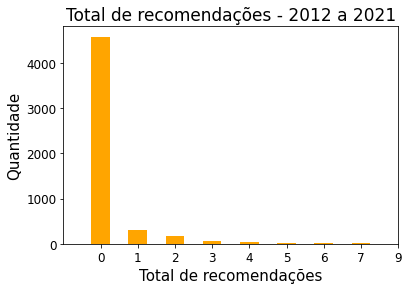

In [ ]:
#Gráfico de barras
oc0['total_recomendacoes'].value_counts().plot.bar(color='orange', fontsize=12)

plt.title('Total de recomendações - 2012 a 2021', fontsize=17)
plt.xlabel('Total de recomendações', fontsize=15)
plt.xlim(-1, 8)
plt.xticks(rotation='horizontal')
plt.ylabel('Quantidade', fontsize=15);

Text(0, 0.5, 'Total de recomendação')

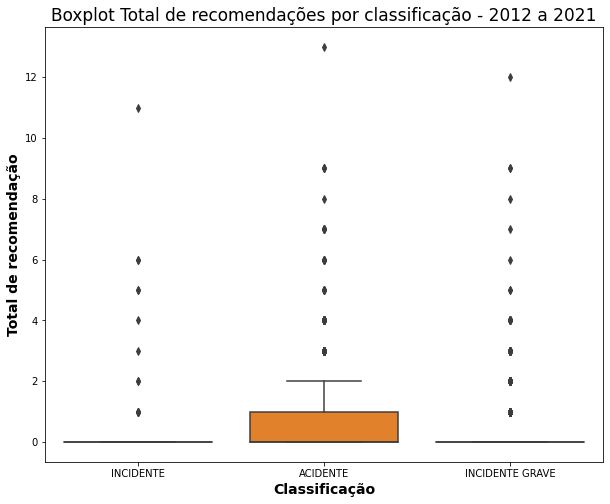

In [ ]:
# Distribuição do total de recomendações por classificação
plt.figure(figsize=(10., 8.))

sns.boxplot(x = 'ocorrencia_classificacao', y = 'total_recomendacoes', data = oc0)

plt.title('Boxplot Total de recomendações por classificação - 2012 a 2021', fontsize=17)
plt.xlabel('Classificação', fontsize=14, fontweight='bold')
plt.ylabel('Total de recomendação', fontsize=14, fontweight='bold')

### Qual a distribuição das ocorrências por ano?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Densidade')

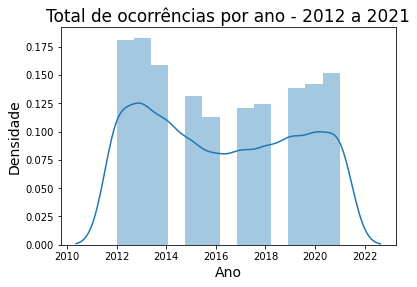

In [ ]:
#distribuição por ano
sns.distplot(oc0['ocorrencia_ano'])

plt.title('Total de ocorrências por ano - 2012 a 2021', fontsize=17)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Densidade', fontsize=14)

Text(0, 0.5, 'Ano')

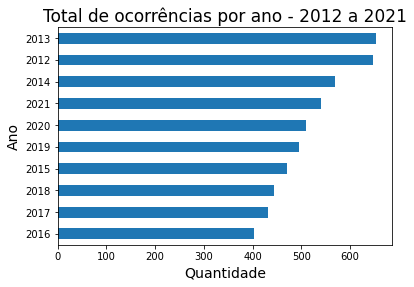

In [ ]:
# Distribuição de ocorrências por ano, saída por valor
oc0.groupby('ocorrencia_ano').size().sort_values().plot(kind='barh')

plt.title('Total de ocorrências por ano - 2012 a 2021', fontsize=17)
plt.xlabel('Quantidade', fontsize=14)
plt.ylabel('Ano', fontsize=14)

Text(0, 0.5, 'Ano')

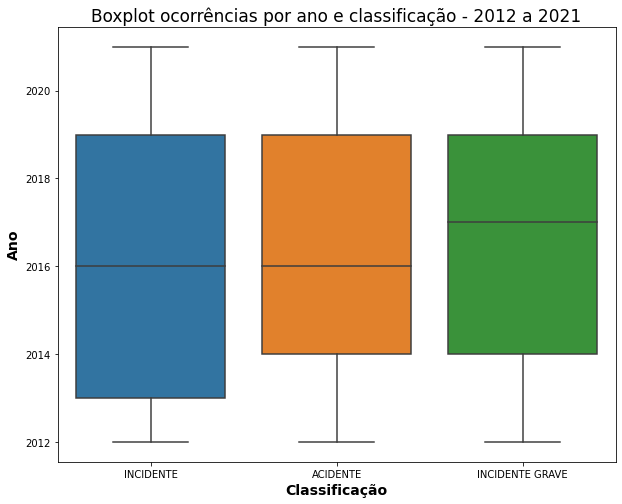

In [ ]:
#Boxplot
plt.figure(figsize=(10., 8.))

sns.boxplot(x = 'ocorrencia_classificacao', y = 'ocorrencia_ano', data = oc0)

plt.title('Boxplot ocorrências por ano e classificação - 2012 a 2021', fontsize=17)
plt.xlabel('Classificação', fontsize=14, fontweight='bold')
plt.ylabel('Ano', fontsize=14, fontweight='bold')

### Qual horário por dia em que há mais acidentes?

Text(0.5, 1.0, 'Número de ocorrências por hora')

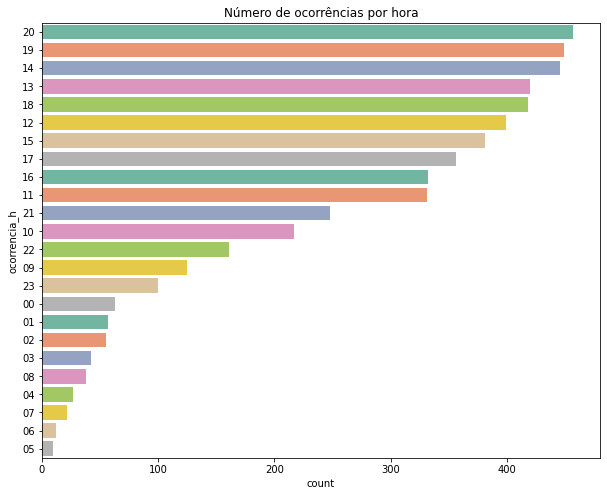

In [ ]:
plt.figure(figsize=(10., 8.))
oc0['ocorrencia_h'] = oc0['ocorrencia_hora'].astype(str).apply(lambda x: x[:2])
sns.countplot(y = 'ocorrencia_h', data=oc0, palette="Set2", order=oc0['ocorrencia_h'].value_counts().index).set_title("Número de ocorrências por hora")

---
# Análise da Tabela Ocorrencia tipo



---

Para dar continuidade, extraiu-se os dados do dataset e selecionou-se as colunas a serem usadas


### Dicionário dos dados
- **codigo_ocorrencia:** código da ocorrência
- **ocorrencia_tipo:** tipo da ocorrência
- **ocorrencia_tipo_categoria:** categoria do tipo de ocorrência
- **taxonomia_tipo_icao:** taxonimia do tipo de ocorrência

## Preparação dos dados


---

In [ ]:
# Baixando o dataset ocorrencia tipo
url = 'http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv'
oc1 = pd.read_csv(url,delimiter=';')
oc1.head()



,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
1,45332,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G
2,45333,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
3,45334,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
4,45390,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT


In [ ]:
# extração das colunas do dataset
oc1 = oc1[['codigo_ocorrencia1', 'ocorrencia_tipo', 'ocorrencia_tipo_categoria']]

In [ ]:
# visualizando o dataset 
print(f"O dataset possui {oc1.shape[0]} linhas e {oc1.shape[1]} colunas")
oc1.head()

O dataset possui 5347 linhas e 3 colunas


,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria
0,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO
1,45332,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO
2,45333,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...
3,45334,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...
4,45390,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE




## Análise Exploratória do Tipo de ocorrência


---

### Quantos tipos de ocorrência existem e os 10 mais frequentes no período

In [ ]:
# quantas tipos de ocorrência existem
len(oc1['ocorrencia_tipo'].unique())

81

In [ ]:
# 10 principais tipos de ocorrência
oc1['ocorrencia_tipo'].value_counts()[ :10]

FALHA DO MOTOR EM VOO                                 669
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE    596
ESTOURO DE PNEU                                       578
PERDA DE CONTROLE NO SOLO                             386
PERDA DE CONTROLE EM VOO                              325
COM TREM DE POUSO                                     314
OUTROS                                                245
COLISÃO COM AVE                                       199
EXCURSÃO DE PISTA                                     188
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO     173
Name: ocorrencia_tipo, dtype: int64

### Quantas categorias de tipos de ocorrência existem e os 10 mais frequentes no período

In [ ]:
# quantas tipos de ocorrência existem
len(oc1['ocorrencia_tipo_categoria'].unique())

81

In [ ]:
# 10 principais tipos de ocorrência
oc1['ocorrencia_tipo_categoria'].value_counts()[ :10]

FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO               669
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE                        596
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | ESTOURO DE PNEU      578
PERDA DE CONTROLE NO SOLO                                                 386
PERDA DE CONTROLE EM VOO                                                  325
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | COM TREM DE POUSO    314
OUTROS                                                                    245
COLISÃO COM AVE                                                           199
EXCURSÃO DE PISTA                                                         188
COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO                         173
Name: ocorrencia_tipo_categoria, dtype: int64

Após análise do tipo de ocorrência, escolheu-se utilizar somente a coluna ocorrencia_tipo

## Merge dos dados e preparação dos dados


---

Para o merge dos dados, utilizou-se o dataset de ocorrencias com as colunas escolhidas do dataset ocorrencia_tipo

### Seleção dos dados de ocorrencia tipo para o merge

In [ ]:
# extração das colunas do dataset
oc1 = oc1[['codigo_ocorrencia1', 'ocorrencia_tipo']]
oc1.head()

,codigo_ocorrencia1,ocorrencia_tipo
0,45331,COM PESSOAL EM VOO
1,45332,PERDA DE CONTROLE NO SOLO
2,45333,FALHA DO MOTOR EM VOO
3,45334,ESTOURO DE PNEU
4,45390,OPERAÇÃO A BAIXA ALTITUDE


### Merge dos dois dataset

In [ ]:
oc0_1 = pd.merge(oc0, oc1, on='codigo_ocorrencia1')

In [ ]:
# visualizando o dataset 
print(f"O dataset possui {oc0_1.shape[0]} linhas e {oc0_1.shape[1]} colunas")
oc0_1.head()

O dataset possui 5346 linhas e 16 colunas


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_ano,ocorrencia_tipo
0,52242,52242,52242,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,20:27:00,FINALIZADA,0,1,2012,ESTOURO DE PNEU
1,45331,45331,45331,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,13:44:00,FINALIZADA,3,1,2012,COM PESSOAL EM VOO
2,45333,45333,45333,45333,45333,ACIDENTE,VIAMÃO,RS,****,2012-01-06,13:00:00,FINALIZADA,0,1,2012,FALHA DO MOTOR EM VOO
3,45401,45401,45401,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,****,2012-01-06,17:00:00,IND,0,1,2012,FALHA DO MOTOR EM VOO
4,45407,45407,45407,45407,45407,ACIDENTE,SÃO SEPÉ,RS,****,2012-01-06,16:30:00,FINALIZADA,0,1,2012,PERDA DE CONTROLE NO SOLO


### Acerto dos dados obtidos

In [ ]:
#verificando dados faltantes
oc0_1.isnull().sum().sort_values(ascending=False)[:10]

ocorrencia_tipo               1
codigo_ocorrencia1            0
ano                           0
ocorrencia_h                  0
ocorrencia_ano                0
total_aeronaves_envolvidas    0
total_recomendacoes           0
investigacao_status           0
ocorrencia_hora               0
codigo_ocorrencia             0
dtype: int64

In [ ]:
oc0_1['ocorrencia_tipo'] = oc0_1['ocorrencia_tipo'].fillna('IND')

In [ ]:
#verificando dados faltantes
oc0_1.isnull().sum().sort_values(ascending=False)[:10]

codigo_ocorrencia           0
codigo_ocorrencia1          0
codigo_ocorrencia2          0
codigo_ocorrencia3          0
codigo_ocorrencia4          0
ocorrencia_classificacao    0
ocorrencia_cidade           0
ocorrencia_uf               0
ocorrencia_aerodromo        0
ocorrencia_dia              0
dtype: int64

---
# Análise da Tabela Aeronave



---

Continuando a preparar o dataset para análise, extraiu-se os dados do dataset aeronave e selecionou-se as colunas a serem usadas

### Dicionário
- **codigo_ocorrencia:** código da ocorrência
- **aeronave_matricula:** matrícula da aeronave
- **aeronave_operador_categoria:** cCategoria do operador
- **aeronave_tipo_veiculo:** tipo de Veículo 
- **aeronave_fabricante:** fabricante da aeronave
- **aeronave_modelo:** modelo da aeronave
- **aeronave_tipo_icao:** designativo internacional para um modelo de aeronave 
- **aeronave_motor_tipo:** tipo do motor
- **aeronave_motor_quantidade:**: quantidade de Motor
- **aeronave_pmd:** peso máximo de decolagem
- **aeronave_pmd_categoria:** peso máximo de decolagem
- **aeronave_assentos:** quantidade de assentos da aeronave
- **aeronave_ano_fabricacao:** ano de fabricação da aeronave
- **aeronave_pais_fabricante:** país de fabricação da aeronave
- **aeronave_pais_registro:** país de registro da aeronave
- **aeronave_registro_categoria:**  categoria de registro da aeronave 
- **aeronave_registro_segmento:** segmento da aeronave
- **aeronave_voo_origem:** origem do Voo
- **aeronave_voo_destino:** destino do Voo
- **aeronave_fase_operacao:** fase de operação da aeronave
- **aeronave_tipo_operacao:** tipo de operação da aeronave 
- **aeronave_nivel_dano:** danos da aeronave
- **aeronave_fatalidades_total:** número de Óbitos

## Preparação dos dados


---

In [ ]:
# Baixando o dataset aeronave
url = 'http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv'
oc2 = pd.read_csv(url,delimiter=';')


In [ ]:
#visualização do dataframe
print(f"O dataset possui {oc2.shape[0]} linhas e {oc2.shape[1]} colunas")
oc2.head()

O dataset possui 5235 linhas e 23 colunas


,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,45331,PRTKB,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0
1,45332,PTUDD,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,SUBSTANCIAL,0
2,45333,PTGOO,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0
3,45334,PRMHX,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,REGULAR,LEVE,0
4,45390,PTUEW,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0


In [ ]:
# visualizando as colunas do dataset para seleção das colunas a serem usadas
oc2.columns

Index(['codigo_ocorrencia2', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_categoria',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total'],
      dtype='object')

In [ ]:
# extração das colunas do dataset
oc2 = oc2[['codigo_ocorrencia2', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_motor_tipo', 'aeronave_motor_quantidade', 
       'aeronave_pais_fabricante', 'aeronave_registro_segmento', 'aeronave_fase_operacao',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano',
       'aeronave_fatalidades_total']]

Verificando dados faltantes

In [ ]:
#verificando dados faltantes
oc2.isnull().sum().sort_values(ascending=False)[:10]

aeronave_motor_tipo           5
codigo_ocorrencia2            0
aeronave_tipo_veiculo         0
aeronave_fabricante           0
aeronave_motor_quantidade     0
aeronave_pais_fabricante      0
aeronave_registro_segmento    0
aeronave_fase_operacao        0
aeronave_tipo_operacao        0
aeronave_nivel_dano           0
dtype: int64

Substituindo dados faltantes por indeterminado

In [ ]:
oc2['aeronave_motor_tipo'] = oc2['aeronave_motor_tipo'].fillna('IND')

In [ ]:
oc2.isnull().sum().sort_values(ascending=False)[:10]

codigo_ocorrencia2            0
aeronave_tipo_veiculo         0
aeronave_fabricante           0
aeronave_motor_tipo           0
aeronave_motor_quantidade     0
aeronave_pais_fabricante      0
aeronave_registro_segmento    0
aeronave_fase_operacao        0
aeronave_tipo_operacao        0
aeronave_nivel_dano           0
dtype: int64

In [ ]:
#visualização do dataframe
print(f"O dataset possui {oc2.shape[0]} linhas e {oc2.shape[1]} colunas")
oc2.head()

O dataset possui 5235 linhas e 11 colunas


,codigo_ocorrencia2,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pais_fabricante,aeronave_registro_segmento,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,45331,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,BRASIL,REGULAR,DESCIDA,REGULAR,NENHUM,0
1,45332,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,BRASIL,ESPECIALIZADA,DECOLAGEM,AGRÍCOLA,SUBSTANCIAL,0
2,45333,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,BRASIL,ESPECIALIZADA,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0
3,45334,AVIÃO,AIRBUS INDUSTRIE,JATO,BIMOTOR,BRASIL,REGULAR,CORRIDA APÓS POUSO,REGULAR,LEVE,0
4,45390,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,BRASIL,AGRÍCOLA,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0


## Análise Exploratória de Aeronaves


---

### Quais os principais tipos de veiculos?

In [ ]:
#Quantidade de ocorrências por tipo de veículo
oc2['aeronave_tipo_veiculo'].value_counts()

AVIÃO          4188
HELICÓPTERO     550
ULTRALEVE       304
***             155
PLANADOR         17
ANFÍBIO          12
TRIKE             5
DIRIGÍVEL         2
BALÃO             1
HIDROAVIÃO        1
Name: aeronave_tipo_veiculo, dtype: int64

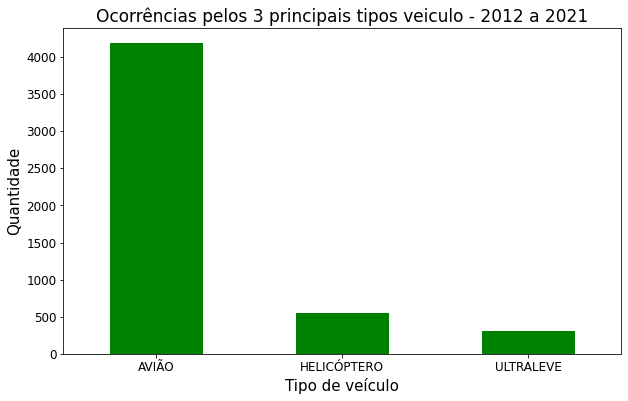

In [ ]:
#Gráfico de barras

oc2['aeronave_tipo_veiculo'].value_counts()[:3].plot.bar(color='green', fontsize=12, figsize=(10.,6.))

plt.title('Ocorrências pelos 3 principais tipos veiculo - 2012 a 2021', fontsize=17)
plt.xlabel('Tipo de veículo', fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Quantidade', fontsize=15);

### Quais os principais segmentos?

In [ ]:
#Quantidade de ocorrências por segmento
oc2['aeronave_registro_segmento'].value_counts()

PARTICULAR                1654
REGULAR                   1055
INSTRUÇÃO                  704
TÁXI AÉREO                 630
EXPERIMENTAL               426
AGRÍCOLA                   350
ADMINISTRAÇÃO DIRETA       183
ESPECIALIZADA               94
***                         72
MÚLTIPLA                    32
NÃO REGULAR                 29
ADMINISTRAÇÃO INDIRETA       5
HISTÓRICA                    1
Name: aeronave_registro_segmento, dtype: int64

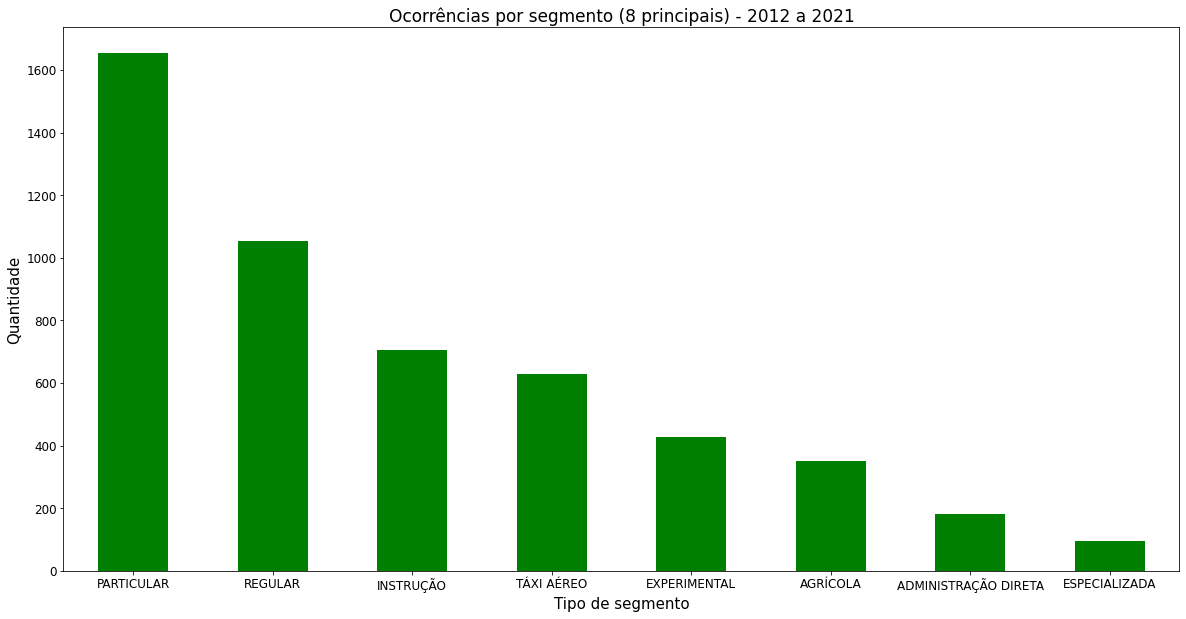

In [ ]:
#Gráfico de barras
oc2['aeronave_registro_segmento'].value_counts()[:8].plot.bar(color='green', fontsize=12, figsize=(20.,10.))

plt.title('Ocorrências por segmento (8 principais) - 2012 a 2021', fontsize=17)
plt.xlabel('Tipo de segmento', fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Quantidade', fontsize=15);

### Quantos são os fabricantes de aeronaves envolvidas em ocorrências

In [ ]:
oc2['aeronave_fabricante'].value_counts()

CESSNA AIRCRAFT                     838
NEIVA INDUSTRIA AERONAUTICA         583
EMBRAER                             582
PIPER AIRCRAFT                      381
***                                 348
                                   ... 
CARLOS EDUARDO NASCIMENTO SEVERO      1
PARTICULAR                            1
VINICIUS MARINI FERREIRA              1
FLAVIO BUCHALLA                       1
BOMBARDIER CANADAIR                   1
Name: aeronave_fabricante, Length: 234, dtype: int64

In [ ]:
len(oc2['aeronave_fabricante'].unique())

234

### Quais os principais países fabricantes de aeronaves?

In [ ]:
#Quantidade de ocorrências por país fabricante
oc2['aeronave_pais_fabricante'].value_counts()

BRASIL              5142
ESTADOS UNIDOS        40
NÃO IDENTIFICADO      13
PARAGUAI               6
ARGENTINA              5
CHILE                  4
BOLÍVIA                3
PORTUGAL               3
ESPANHA                3
ALEMANHA               2
COLÔMBIA               2
ITÁLIA                 1
HOLANDA                1
FRANÇA                 1
VENEZUELA              1
URUGUAI                1
PANAMÁ                 1
EMIRADOS ÁRABES        1
POLÔNIA                1
RÚSSIA                 1
SUIÇA                  1
ÁFRICA DO SUL          1
UCRÂNIA                1
Name: aeronave_pais_fabricante, dtype: int64

In [ ]:
len(oc2['aeronave_pais_fabricante'].unique())

23

### Qual tipo de motor e a quantidade de motor das aeronaves envolvidas em ocorrencias?

In [ ]:
#Quantidade de ocorrências por tipo de motor
oc2['aeronave_motor_tipo'].value_counts()

PISTÃO        2884
JATO           967
TURBOÉLICE     664
TURBOEIXO      471
***            227
SEM TRAÇÃO      17
IND              5
Name: aeronave_motor_tipo, dtype: int64

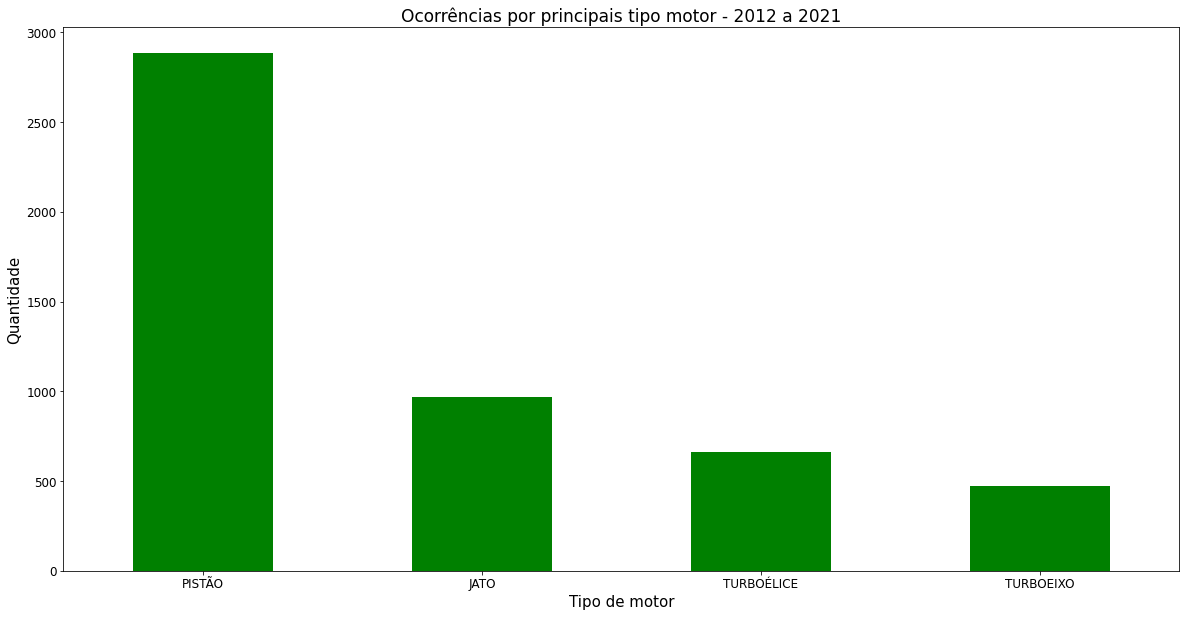

In [ ]:
#Gráfico de barras
oc2['aeronave_motor_tipo'].value_counts()[:4].plot.bar(color='green', fontsize=12, figsize=(20.,10.))

plt.title('Ocorrências por principais tipo motor - 2012 a 2021', fontsize=17)
plt.xlabel('Tipo de motor', fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Quantidade', fontsize=15);

In [ ]:
#Quantidade de ocorrências por quantidade de motor
oc2['aeronave_motor_quantidade'].value_counts()

MONOMOTOR      2673
BIMOTOR        2230
SEM TRAÇÃO      167
***              92
TRIMOTOR         68
QUADRIMOTOR       5
Name: aeronave_motor_quantidade, dtype: int64

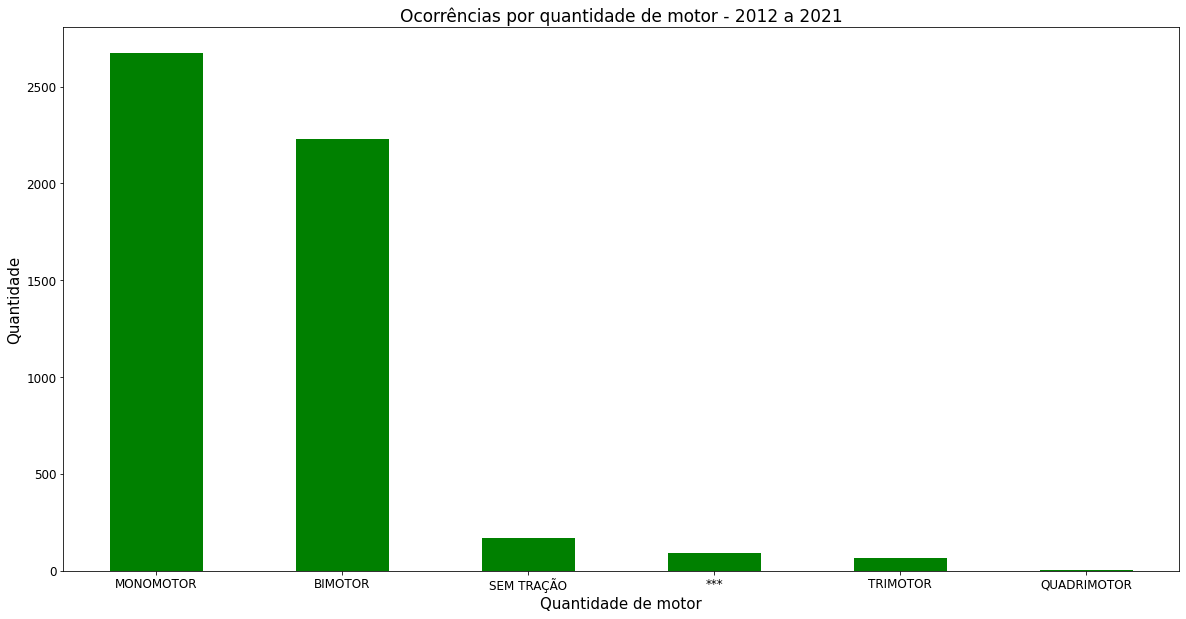

In [ ]:
#Gráfico de barras
oc2['aeronave_motor_quantidade'].value_counts().plot.bar(color='green', fontsize=12, figsize=(20.,10.))

plt.title('Ocorrências por quantidade de motor - 2012 a 2021', fontsize=17)
plt.xlabel('Quantidade de motor', fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Quantidade', fontsize=15);

In [ ]:
# distribuição da quantidade por tipo de motor
pd.crosstab(oc2['aeronave_motor_quantidade'],oc2['aeronave_motor_tipo'])


aeronave_motor_tipo,***,IND,JATO,PISTÃO,SEM TRAÇÃO,TURBOEIXO,TURBOÉLICE
aeronave_motor_quantidade,,,,,,,
***,85,0,3,1,0,1,2
BIMOTOR,0,0,891,609,0,270,460
MONOMOTOR,3,0,0,2271,0,200,199
QUADRIMOTOR,1,0,4,0,0,0,0
SEM TRAÇÃO,138,5,2,2,17,0,3
TRIMOTOR,0,0,67,1,0,0,0


### Quais os tipos de operação?

In [ ]:
#Quantidade de ocorrências por tipo de operação
oc2['aeronave_tipo_operacao'].value_counts()

PRIVADA          1790
REGULAR          1050
INSTRUÇÃO         669
TÁXI AÉREO        606
AGRÍCOLA          483
EXPERIMENTAL      235
POLICIAL          145
***               141
NÃO REGULAR        61
ESPECIALIZADA      55
Name: aeronave_tipo_operacao, dtype: int64

### Relação de ocorrencias por tipo de operação executada e pelo segmento de registro

In [ ]:
# distribuição da quantidade de ocorrencias por tipo de operação e segmento
pd.crosstab(oc2['aeronave_tipo_operacao'],oc2['aeronave_registro_segmento'])

aeronave_registro_segmento,***,ADMINISTRAÇÃO DIRETA,ADMINISTRAÇÃO INDIRETA,AGRÍCOLA,ESPECIALIZADA,EXPERIMENTAL,HISTÓRICA,INSTRUÇÃO,MÚLTIPLA,NÃO REGULAR,PARTICULAR,REGULAR,TÁXI AÉREO
aeronave_tipo_operacao,,,,,,,,,,,,,
***,37,15,0,4,1,8,1,8,3,1,33,25,5
AGRÍCOLA,0,0,0,333,49,0,0,0,4,0,97,0,0
ESPECIALIZADA,2,5,2,5,34,1,0,0,3,0,1,0,2
EXPERIMENTAL,2,0,0,0,0,231,0,0,0,0,2,0,0
INSTRUÇÃO,0,3,0,1,1,2,0,642,0,0,16,1,3
NÃO REGULAR,3,11,0,0,0,0,0,1,8,15,6,1,16
POLICIAL,0,143,1,0,1,0,0,0,0,0,0,0,0
PRIVADA,15,5,2,7,7,184,0,52,1,1,1495,0,21
REGULAR,12,0,0,0,0,0,0,1,0,7,1,1028,1


### Qual a quantidade de ocorrência por fase de operação?

In [ ]:
#Quantidade de ocorrências por fase de operação
oc2['aeronave_fase_operacao'].value_counts()

POUSO                              873
DECOLAGEM                          835
CRUZEIRO                           820
CORRIDA APÓS POUSO                 567
TÁXI                               385
SUBIDA                             376
APROXIMAÇÃO FINAL                  291
MANOBRA                            220
DESCIDA                            138
ESPECIALIZADA                      138
CIRCUITO DE TRÁFEGO                106
INDETERMINADA                       88
ESTACIONAMENTO                      71
VOO A BAIXA ALTURA                  60
OUTRA FASE                          42
ARREMETIDA NO SOLO                  36
ARREMETIDA NO AR                    28
***                                 26
OPERAÇÃO DE SOLO                    25
PARTIDA DO MOTOR                    19
PROCEDIMENTO DE APROXIMAÇÃO IFR     17
PAIRADO                             16
DECOLAGEM VERTICAL                  13
RETA FINAL                          11
SAÍDA IFR                            9
PUSHBACK                 

In [ ]:
len(#Quantidade de ocorrências por tipo de operação
oc2['aeronave_fase_operacao'].unique())

32

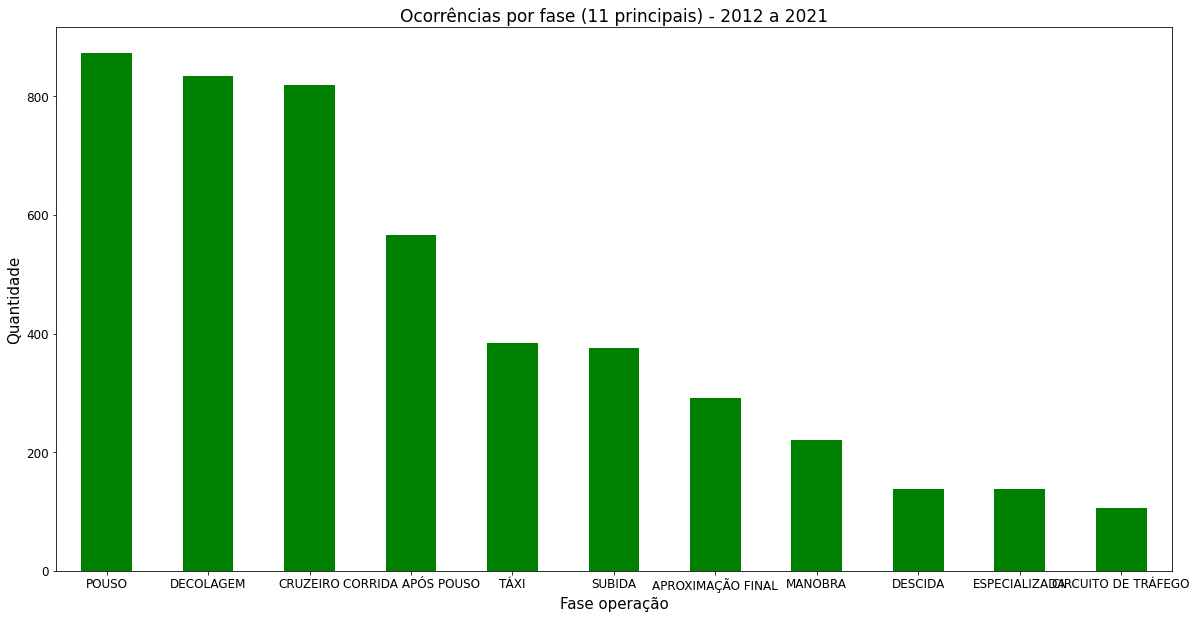

In [ ]:
#Gráfico de barras
oc2['aeronave_fase_operacao'].value_counts()[:11].plot.bar(color='green', fontsize=12, figsize=(20.,10.))

plt.title('Ocorrências por fase (11 principais) - 2012 a 2021', fontsize=17)
plt.xlabel('Fase operação', fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Quantidade', fontsize=15);

In [ ]:
#Quantidade de ocorrências por nível do dano
oc2['aeronave_nivel_dano'].value_counts()

NENHUM         1879
LEVE           1510
SUBSTANCIAL    1499
DESTRUÍDA       300
***              47
Name: aeronave_nivel_dano, dtype: int64

In [ ]:
# distribuição da quantidade de ocorrencias por nivel de dano e tipo de operação
pd.crosstab(oc2['aeronave_nivel_dano'],oc2['aeronave_tipo_operacao'])

aeronave_tipo_operacao,***,AGRÍCOLA,ESPECIALIZADA,EXPERIMENTAL,INSTRUÇÃO,NÃO REGULAR,POLICIAL,PRIVADA,REGULAR,TÁXI AÉREO
aeronave_nivel_dano,,,,,,,,,,
***,5,0,0,1,3,1,0,29,4,4
DESTRUÍDA,6,53,4,46,15,1,4,151,0,20
LEVE,59,78,18,48,206,25,65,543,262,206
NENHUM,61,16,19,36,227,24,45,416,764,271
SUBSTANCIAL,10,336,14,104,218,10,31,651,20,105


Há muitas ocorrências fatais?

In [ ]:
#Quantidade de ocorrências de fatalidades
oc2['aeronave_fatalidades_total'].value_counts()


0     4845
1      203
2      107
3       25
4       24
5       19
6        5
8        3
7        3
10       1
Name: aeronave_fatalidades_total, dtype: int64

In [ ]:
#Quantidade de ocorrências de fatalidades ponderada
oc2['aeronave_fatalidades_total'].value_counts(normalize = True)

0     0.925501
1     0.038777
2     0.020439
3     0.004776
4     0.004585
5     0.003629
6     0.000955
8     0.000573
7     0.000573
10    0.000191
Name: aeronave_fatalidades_total, dtype: float64




## Merge dos dados com a tabela de aeronaves e preparação dos dados


---



### Merge do dataset principal com o de aeronaves

In [ ]:
oc1_2 = pd.merge(oc0_1, oc2, on='codigo_ocorrencia2')

In [ ]:
# visualizando o dataset 
print(f"O dataset possui {oc1_2.shape[0]} linhas e {oc1_2.shape[1]} colunas")
oc1_2.head()

O dataset possui 5416 linhas e 26 colunas


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,...,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pais_fabricante,aeronave_registro_segmento,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,52242,52242,52242,52242,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,2012-01-05,...,AVIÃO,RAYTHEON AIRCRAFT,PISTÃO,BIMOTOR,BRASIL,PARTICULAR,POUSO,PRIVADA,LEVE,0
1,45331,45331,45331,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,...,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,BRASIL,REGULAR,DESCIDA,REGULAR,NENHUM,0
2,45333,45333,45333,45333,45333,ACIDENTE,VIAMÃO,RS,****,2012-01-06,...,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,BRASIL,ESPECIALIZADA,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0
3,45401,45401,45401,45401,45401,ACIDENTE,SÃO SEBASTIÃO,SP,****,2012-01-06,...,ULTRALEVE,***,PISTÃO,MONOMOTOR,BRASIL,EXPERIMENTAL,CRUZEIRO,EXPERIMENTAL,LEVE,0
4,45407,45407,45407,45407,45407,ACIDENTE,SÃO SEPÉ,RS,****,2012-01-06,...,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,BRASIL,ESPECIALIZADA,POUSO,AGRÍCOLA,SUBSTANCIAL,0


In [ ]:
#verificando dados faltantes
oc1_2.isnull().sum().sort_values(ascending=False)[:10]

codigo_ocorrencia             0
codigo_ocorrencia1            0
aeronave_nivel_dano           0
aeronave_tipo_operacao        0
aeronave_fase_operacao        0
aeronave_registro_segmento    0
aeronave_pais_fabricante      0
aeronave_motor_quantidade     0
aeronave_motor_tipo           0
aeronave_fabricante           0
dtype: int64

### Salva os dados

In [ ]:
# salva a tabela obtida
oc1_2.to_csv('oc1_2.csv', index=False)



---
# Análise da Tabela Fator Contribuinte



---


Finalmente, extraiu-se os dados do dataset e selecionou-se as colunas a serem usadas do dataset fator contribuinte

### Dicionário dos dados
- **codigo_ocorrencia**: Código da ocorrência
- **fator_nome:** Nome do fator contribuiente da ocorrência
- **fator_aspecto:** Aspecto contribuiente da ocorrência
- **fator_condicionante:** Condicionante contribuinte da ocorrência
- **fator_area:** Area contribuinte da ocorrência

## Preparação dos dados


---

In [ ]:
# Baixando o dataset ocorrencia tipo
url = 'http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv'
oc3 = pd.read_csv(url,delimiter=';')
oc3.head()

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,45331,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,45331,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,45331,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
3,45331,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
4,45331,COMUNICAÇÃO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO


In [ ]:
oc3.isnull().sum().sort_values(ascending=False)

codigo_ocorrencia3     0
fator_nome             0
fator_aspecto          0
fator_condicionante    0
fator_area             0
dtype: int64



## Análise Exploratória do Fator Contribuinte


---

### Quais são os principais fatores contribuintes

In [ ]:
# quantas tipos de ocorrência existem
len(oc3['fator_nome'].unique())

74

In [ ]:
# 10 principais tipos de ocorrência
oc3['fator_nome'].value_counts()[ :15]

JULGAMENTO DE PILOTAGEM              472
APLICAÇÃO DE COMANDOS                327
PLANEJAMENTO DE VOO                  256
SUPERVISÃO GERENCIAL                 234
MANUTENÇÃO DA AERONAVE               213
PROCESSO DECISÓRIO                   189
ATITUDE                              168
POUCA EXPERIÊNCIA DO PILOTO          148
PERCEPÇÃO                            126
INDISCIPLINA DE VOO                  113
CONDIÇÕES METEOROLÓGICAS ADVERSAS     91
ATENÇÃO                               83
PROCESSOS ORGANIZACIONAIS             73
INSTRUÇÃO                             71
COORDENAÇÃO DE CABINE                 67
Name: fator_nome, dtype: int64

### Quais áreas contribuiram mais para as ocorrências?

In [ ]:
# quantidade de ocorrencias por area
oc3['fator_area'].value_counts()

FATOR OPERACIONAL    2209
FATOR HUMANO         1151
OUTRO                  62
FATOR MATERIAL         23
***                    19
Name: fator_area, dtype: int64

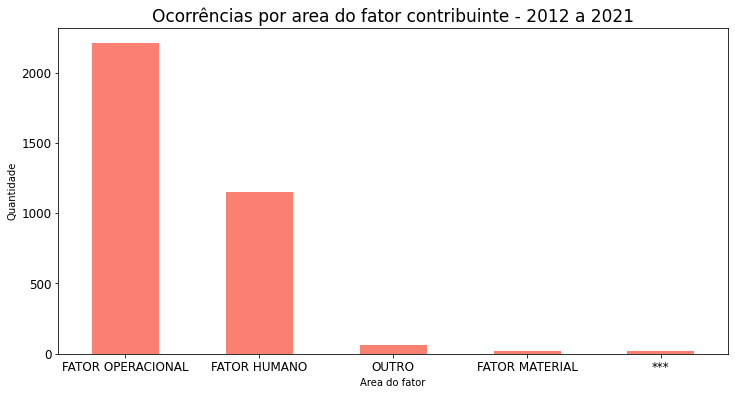

In [ ]:
oc3['fator_area'].value_counts().plot.bar(color='salmon', fontsize=12, figsize=(12.,6.))

plt.title('Ocorrências por area do fator contribuinte - 2012 a 2021', fontsize=17)
plt.xlabel('Area do fator', fontsize=10)
plt.xticks(rotation='horizontal')
plt.ylabel('Quantidade', fontsize=10);

### Quais principais aspectos e como eles se relacionam com as áreas de fator contribuinte

In [ ]:
# quantidade de ocorrencias por aspecto do fator
oc3['fator_aspecto'].value_counts()

DESEMPENHO DO SER HUMANO                          2038
ASPECTO PSICOLÓGICO                               1072
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL      96
ASPECTO MÉDICO                                      69
INFRAESTRUTURA AEROPORTUÁRIA                        66
OUTRO                                               62
***                                                 19
ASPECTO DE PROJETO                                  10
ERGONOMIA                                           10
INFRAESTRUTURA DE TRÁFEGO AÉREO                      9
ASPECTO DE FABRICAÇÃO                                8
ASPECTO DE MANUSEIO DO MATERIAL                      5
Name: fator_aspecto, dtype: int64

In [ ]:
# distribuição da quantidade de ocorrencias por area e aspecto
pd.crosstab(oc3['fator_area'],oc3['fator_aspecto'])

fator_aspecto,***,ASPECTO DE FABRICAÇÃO,ASPECTO DE MANUSEIO DO MATERIAL,ASPECTO DE PROJETO,ASPECTO MÉDICO,ASPECTO PSICOLÓGICO,DESEMPENHO DO SER HUMANO,ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL,ERGONOMIA,INFRAESTRUTURA AEROPORTUÁRIA,INFRAESTRUTURA DE TRÁFEGO AÉREO,OUTRO
fator_area,,,,,,,,,,,,
***,19,0,0,0,0,0,0,0,0,0,0,0
FATOR HUMANO,0,0,0,0,69,1072,0,0,10,0,0,0
FATOR MATERIAL,0,8,5,10,0,0,0,0,0,0,0,0
FATOR OPERACIONAL,0,0,0,0,0,0,2038,96,0,66,9,0
OUTRO,0,0,0,0,0,0,0,0,0,0,0,62


### Que informações podemos tirar do fator condicionante?

In [ ]:
# quantidade de ocorrencias por fator condicionante
oc3['fator_condicionante'].value_counts()

OPERAÇÃO DA AERONAVE                      1800
INDIVIDUAL                                 674
***                                        354
ORGANIZACIONAL                             293
MANUTENÇÃO DA AERONAVE                     213
PSICOSSOCIAL                               105
PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO      25
Name: fator_condicionante, dtype: int64

In [ ]:
# distribuição da quantidade de ocorrencias por area e fator condicionante
pd.crosstab(oc3['fator_area'],oc3['fator_condicionante'])

fator_condicionante,***,INDIVIDUAL,MANUTENÇÃO DA AERONAVE,OPERAÇÃO DA AERONAVE,ORGANIZACIONAL,PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO,PSICOSSOCIAL
fator_area,,,,,,,
***,19,0,0,0,0,0,0
FATOR HUMANO,79,674,0,0,293,0,105
FATOR MATERIAL,23,0,0,0,0,0,0
FATOR OPERACIONAL,171,0,213,1800,0,25,0
OUTRO,62,0,0,0,0,0,0


In [ ]:
# distribuição da quantidade de ocorrencias por fator condicionante e aspecto
pd.crosstab(oc3['fator_condicionante'],oc3['fator_aspecto'])

fator_aspecto,***,ASPECTO DE FABRICAÇÃO,ASPECTO DE MANUSEIO DO MATERIAL,ASPECTO DE PROJETO,ASPECTO MÉDICO,ASPECTO PSICOLÓGICO,DESEMPENHO DO SER HUMANO,ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL,ERGONOMIA,INFRAESTRUTURA AEROPORTUÁRIA,INFRAESTRUTURA DE TRÁFEGO AÉREO,OUTRO
fator_condicionante,,,,,,,,,,,,
***,19,8,5,10,69,0,0,96,10,66,9,62
INDIVIDUAL,0,0,0,0,0,674,0,0,0,0,0,0
MANUTENÇÃO DA AERONAVE,0,0,0,0,0,0,213,0,0,0,0,0
OPERAÇÃO DA AERONAVE,0,0,0,0,0,0,1800,0,0,0,0,0
ORGANIZACIONAL,0,0,0,0,0,293,0,0,0,0,0,0
PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO,0,0,0,0,0,0,25,0,0,0,0,0
PSICOSSOCIAL,0,0,0,0,0,105,0,0,0,0,0,0



## Merge dos dados com a tabela de fator contribuinte e preparação dos dados


---

### Merge do dataset principal com o fator contribuinte

In [ ]:
oc2_3 = pd.merge(oc1_2, oc3, on='codigo_ocorrencia3')

In [ ]:
# visualizando o dataset 
print(f"O dataset possui {oc2_3.shape[0]} linhas e {oc2_3.shape[1]} colunas")
oc2_3.head()

O dataset possui 3735 linhas e 30 colunas


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,...,aeronave_pais_fabricante,aeronave_registro_segmento,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,45331,45331,45331,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,...,BRASIL,REGULAR,DESCIDA,REGULAR,NENHUM,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,45331,45331,45331,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,...,BRASIL,REGULAR,DESCIDA,REGULAR,NENHUM,0,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,45331,45331,45331,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,...,BRASIL,REGULAR,DESCIDA,REGULAR,NENHUM,0,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
3,45331,45331,45331,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,...,BRASIL,REGULAR,DESCIDA,REGULAR,NENHUM,0,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
4,45331,45331,45331,45331,45331,ACIDENTE,GUARULHOS,SP,SBGR,2012-01-06,...,BRASIL,REGULAR,DESCIDA,REGULAR,NENHUM,0,COMUNICAÇÃO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO


In [ ]:
oc2_3.isnull().sum().sort_values(ascending=False)[ :5]

codigo_ocorrencia      0
codigo_ocorrencia1     0
fator_condicionante    0
fator_aspecto          0
fator_nome             0
dtype: int64

### Salva os dados

In [ ]:
# salva a tabela obtida
oc2_3.to_csv('oc2_3.csv', index=False)

---
# Cruzando alguns dados



---

#### Segmento das aeronaves por classe de ocorrência

In [ ]:
# distribuição da quantidade de ocorrencias por area e aspecto
pd.crosstab(oc1_2['ocorrencia_classificacao'],oc1_2['aeronave_registro_segmento'])

aeronave_registro_segmento,***,ADMINISTRAÇÃO DIRETA,ADMINISTRAÇÃO INDIRETA,AGRÍCOLA,ESPECIALIZADA,EXPERIMENTAL,HISTÓRICA,INSTRUÇÃO,MÚLTIPLA,NÃO REGULAR,PARTICULAR,REGULAR,TÁXI AÉREO
ocorrencia_classificacao,,,,,,,,,,,,,
ACIDENTE,23,37,2,285,61,298,0,225,17,0,718,16,109
INCIDENTE,38,121,1,24,24,80,1,356,11,26,732,999,449
INCIDENTE GRAVE,12,30,2,62,16,66,0,155,4,5,278,48,85


#### Ocorrências por classe e UF

In [ ]:
# distribuição da quantidade de ocorrencias por area e aspecto
pd.crosstab(oc1_2['ocorrencia_classificacao'],oc1_2['ocorrencia_uf'])

ocorrencia_uf,***,AC,AL,AM,AP,BA,CE,DF,ES,GO,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
ocorrencia_classificacao,,,,,,,,,,,,,,,,,,,,,
ACIDENTE,2,12,1,64,4,60,20,9,15,119,...,141,60,4,17,31,166,61,8,392,19
INCIDENTE,0,28,22,124,7,103,45,91,51,92,...,256,311,9,20,17,132,100,5,795,18
INCIDENTE GRAVE,0,11,5,24,1,38,16,13,10,74,...,55,43,4,9,8,44,15,2,145,11


#### Fator área e aspecto por classe de ocorrência

In [ ]:
pd.crosstab([oc2_3['ocorrencia_classificacao'],oc2_3['fator_area']], oc2_3['fator_aspecto'])

fator_aspecto                               ***  ASPECTO DE FABRICAÇÃO  \
ocorrencia_classificacao fator_area                                      
ACIDENTE                 ***                 14                      0   
                         FATOR HUMANO         0                      0   
                         FATOR MATERIAL       0                      5   
                         FATOR OPERACIONAL    0                      0   
                         OUTRO                0                      0   
INCIDENTE                FATOR HUMANO         0                      0   
                         FATOR MATERIAL       0                      1   
                         FATOR OPERACIONAL    0                      0   
INCIDENTE GRAVE          ***                  6                      0   
                         FATOR HUMANO         0                      0   
                         FATOR MATERIAL       0                      2   
                         FATOR OPERACIONAL    0                      0   
                         OUTRO                0                      0   

fator_aspecto                               ASPECTO DE MANUSEIO DO MATERIAL  \
ocorrencia_classificacao fator_area                                           
ACIDENTE                 ***                                              0   
                         FATOR HUMANO                                     0   
                         FATOR MATERIAL                                   2   
                         FATOR OPERACIONAL                                0   
                         OUTRO                                            0   
INCIDENTE                FATOR HUMANO                                     0   
                         FATOR MATERIAL                                   0   
                         FATOR OPERACIONAL                                0   
INCIDENTE GRAVE          ***                                              0   
                         FATOR HUMANO                                     0   
                         FATOR MATERIAL                                   3   
                         FATOR OPERACIONAL                                0   
                         OUTRO                                            0   

fator_aspecto                               ASPECTO DE PROJETO  \
ocorrencia_classificacao fator_area                              
ACIDENTE                 ***                                 0   
                         FATOR HUMANO                        0   
                         FATOR MATERIAL                      2   
                         FATOR OPERACIONAL                   0   
                         OUTRO                               0   
INCIDENTE                FATOR HUMANO                        0   
                         FATOR MATERIAL                      1   
                         FATOR OPERACIONAL                   0   
INCIDENTE GRAVE          ***                                 0   
                         FATOR HUMANO                        0   
                         FATOR MATERIAL                      7   
                         FATOR OPERACIONAL                   0   
                         OUTRO                               0   

fator_aspecto                               ASPECTO MÉDICO  \
ocorrencia_classificacao fator_area                          
ACIDENTE                 ***                             0   
                         FATOR HUMANO                   58   
                         FATOR MATERIAL                  0   
                         FATOR OPERACIONAL               0   
                         OUTRO                           0   
INCIDENTE                FATOR HUMANO                    0   
                         FATOR MATERIAL                  0   
                         FATOR OPERACIONAL               0   
INCIDENTE GRAVE          ***                             0   
                         FATOR

#### Fator área e condicionante por classe de ocorrência

In [ ]:
pd.crosstab([oc2_3['ocorrencia_classificacao'],oc2_3['fator_area']], oc2_3['fator_condicionante'])

fator_condicionante                         ***  INDIVIDUAL  \
ocorrencia_classificacao fator_area                           
ACIDENTE                 ***                 14           0   
                         FATOR HUMANO        68         603   
                         FATOR MATERIAL       9           0   
                         FATOR OPERACIONAL  144           0   
                         OUTRO               61           0   
INCIDENTE                FATOR HUMANO         0           3   
                         FATOR MATERIAL       2           0   
                         FATOR OPERACIONAL    7           0   
INCIDENTE GRAVE          ***                  6           0   
                         FATOR HUMANO        18         112   
                         FATOR MATERIAL      12           0   
                         FATOR OPERACIONAL   41           0   
                         OUTRO               10           0   

fator_condicionante                         MANUTENÇÃO DA AERONAVE  \
ocorrencia_classificacao fator_area                                  
ACIDENTE                 ***                                     0   
                         FATOR HUMANO                            0   
                         FATOR MATERIAL                          0   
                         FATOR OPERACIONAL                     163   
                         OUTRO                                   0   
INCIDENTE                FATOR HUMANO                            0   
                         FATOR MATERIAL                          0   
                         FATOR OPERACIONAL                       1   
INCIDENTE GRAVE          ***                                     0   
                         FATOR HUMANO                            0   
                         FATOR MATERIAL                          0   
                         FATOR OPERACIONAL                      62   
                         OUTRO                                   0   

fator_condicionante                         OPERAÇÃO DA AERONAVE  \
ocorrencia_classificacao fator_area                                
ACIDENTE                 ***                                   0   
                         FATOR HUMANO                          0   
                         FATOR MATERIAL                        0   
                         FATOR OPERACIONAL                  1577   
                         OUTRO                                 0   
INCIDENTE                FATOR HUMANO                          0   
                         FATOR MATERIAL                        0   
                         FATOR OPERACIONAL                     9   
INCIDENTE GRAVE          ***                                   0   
                         FATOR HUMANO                          0   
                         FATOR MATERIAL                        0   
                         FATOR OPERACIONAL                   356   
                         OUTRO                                 0   

fator_condicionante                         ORGANIZACIONAL  \
ocorrencia_classificacao fator_area                          
ACIDENTE                 ***                             0   
                         FATOR HUMANO                  257   
                         FATOR MATERIAL                  0   
                         FATOR OPERACIONAL               0   
                         OUTRO                           0   
INCIDENTE                FATOR HUMANO                    6   
                         FATOR MATERIAL                  0   
                         FATOR OPERACIONAL               0   
INCIDENTE GRAVE          ***                             0   
                         FATOR HUMANO                   43   
                         FATOR MATERIAL                  0   
                         FATOR OPERACIONAL               0   
                         OUTRO                           0   

fator_condicionante                         PRESTAÇ

#### Fator área por segmento de aeronave e por classe de ocorrência

In [ ]:
pd.crosstab([oc2_3['ocorrencia_classificacao'],oc2_3['aeronave_registro_segmento']], oc2_3['fator_area'])

fator_area                                           ***  FATOR HUMANO  \
ocorrencia_classificacao aeronave_registro_segmento                      
ACIDENTE                 ***                           0             2   
                         ADMINISTRAÇÃO DIRETA          0            60   
                         ADMINISTRAÇÃO INDIRETA        0             5   
                         AGRÍCOLA                      3           169   
                         ESPECIALIZADA                 1            33   
                         EXPERIMENTAL                  0            26   
                         INSTRUÇÃO                     0           120   
                         MÚLTIPLA                      1            15   
                         PARTICULAR                    8           448   
                         REGULAR                       0            27   
                         TÁXI AÉREO                    1           107   
INCIDENTE                ***                           0             0   
                         PARTICULAR                    0             4   
                         REGULAR                       0             7   
                         TÁXI AÉREO                    0             0   
INCIDENTE GRAVE          ***                           0            10   
                         ADMINISTRAÇÃO DIRETA          2            15   
                         ADMINISTRAÇÃO INDIRETA        0            16   
                         AGRÍCOLA                      0             2   
                         ESPECIALIZADA                 0             2   
                         EXPERIMENTAL                  0             3   
                         INSTRUÇÃO                     0             8   
                         MÚLTIPLA                      1             0   
                         NÃO REGULAR                   0             7   
                         PARTICULAR                    1            31   
                         REGULAR                       0            67   
                         TÁXI AÉREO                    2            39   

fator_area                                           FATOR MATERIAL  \
ocorrencia_classificacao aeronave_registro_segmento                   
ACIDENTE                 ***                                      0   
                         ADMINISTRAÇÃO DIRETA                     1   
                         ADMINISTRAÇÃO INDIRETA                   0   
                         AGRÍCOLA                                 1   
                         ESPECIALIZADA                            0   
                         EXPERIMENTAL                             1   
                         INSTRUÇÃO                                0   
                         MÚLTIPLA                                 0   
                         PARTICULAR                               4   
                         REGULAR                                  2   
                         TÁXI AÉREO                               0   
INCIDENTE                ***                                      0   
                         PARTICULAR                               1   
                         REGULAR                                  0   
                         TÁXI AÉREO                               1   
INCIDENTE GRAVE          ***                                      0   
                         ADMINISTRAÇÃO DIRETA                     0   
                         ADMINISTRAÇÃO INDIRETA                   0   
                         AGRÍCOLA                                 0   
                         ESPECIALIZADA                            0   
                         EXPERIMENTAL                             0   
                         INSTRUÇÃO                                0   
                         MÚLTIPLA                                 1   
                         NÃO REGULAR                              0   
       

#### Fator área por nível de dano e classe de ocorrência

In [ ]:
pd.crosstab([oc2_3['ocorrencia_classificacao'],oc2_3['fator_area']], oc2_3['aeronave_nivel_dano'])

aeronave_nivel_dano                         ***  DESTRUÍDA  LEVE  NENHUM  \
ocorrencia_classificacao fator_area                                        
ACIDENTE                 ***                  0          4     0       0   
                         FATOR HUMANO        11        333     5      45   
                         FATOR MATERIAL       0          2     0       0   
                         FATOR OPERACIONAL   13        372    26      33   
                         OUTRO                1          9     2       0   
INCIDENTE                FATOR HUMANO         0          0     7       4   
                         FATOR MATERIAL       0          0     1       1   
                         FATOR OPERACIONAL    0          0    21       4   
INCIDENTE GRAVE          ***                  0          0     2       2   
                         FATOR HUMANO         0          0    97      76   
                         FATOR MATERIAL       0          0     7       3   
                         FATOR OPERACIONAL    2          0   217     104   
                         OUTRO                0          0    10       0   

aeronave_nivel_dano                         SUBSTANCIAL  
ocorrencia_classificacao fator_area                      
ACIDENTE                 ***                         10  
                         FATOR HUMANO               618  
                         FATOR MATERIAL               7  
                         FATOR OPERACIONAL         1444  
                         OUTRO                       49  
INCIDENTE                FATOR HUMANO                 0  
                         FATOR MATERIAL               0  
                         FATOR OPERACIONAL            1  
INCIDENTE GRAVE          ***                          2  
                         FATOR HUMANO                27  
                         FATOR MATERIAL               2  
                         FATOR OPERACIONAL          161  
                         OUTRO                        0

#### Fator condicionante por nível de dano e classe de ocorrência

In [ ]:
pd.crosstab([oc2_3['ocorrencia_classificacao'],oc2_3['fator_condicionante']], oc2_3['aeronave_nivel_dano'])

aeronave_nivel_dano                                              ***  \
ocorrencia_classificacao fator_condicionante                           
ACIDENTE                 ***                                       2   
                         INDIVIDUAL                                9   
                         MANUTENÇÃO DA AERONAVE                    4   
                         OPERAÇÃO DA AERONAVE                      9   
                         ORGANIZACIONAL                            1   
                         PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO    0   
                         PSICOSSOCIAL                              0   
INCIDENTE                ***                                       0   
                         INDIVIDUAL                                0   
                         MANUTENÇÃO DA AERONAVE                    0   
                         OPERAÇÃO DA AERONAVE                      0   
                         ORGANIZACIONAL                            0   
                         PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO    0   
                         PSICOSSOCIAL                              0   
INCIDENTE GRAVE          ***                                       0   
                         INDIVIDUAL                                0   
                         MANUTENÇÃO DA AERONAVE                    0   
                         OPERAÇÃO DA AERONAVE                      2   
                         ORGANIZACIONAL                            0   
                         PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO    0   
                         PSICOSSOCIAL                              0   

aeronave_nivel_dano                                              DESTRUÍDA  \
ocorrencia_classificacao fator_condicionante                                 
ACIDENTE                 ***                                            93   
                         INDIVIDUAL                                    185   
                         MANUTENÇÃO DA AERONAVE                         34   
                         OPERAÇÃO DA AERONAVE                          299   
                         ORGANIZACIONAL                                 78   
                         PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO          3   
                         PSICOSSOCIAL                                   28   
INCIDENTE                ***                                             0   
                         INDIVIDUAL                                      0   
                         MANUTENÇÃO DA AERONAVE                          0   
                         OPERAÇÃO DA AERONAVE                            0   
                         ORGANIZACIONAL                                  0   
                         PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO          0   
                         PSICOSSOCIAL                                    0   
INCIDENTE GRAVE          ***                                             0   
                         INDIVIDUAL                                      0   
                         MANUTENÇÃO DA AERONAVE                          0   
                         OPERAÇÃO DA AERONAVE                            0   
                         ORGANIZACIONAL                                  0   
                         PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO          0   
                         PSICOSSOCIAL                                    0   

aeronave_nivel_dano                                              LEVE  NENHUM  \
ocorrencia_classificacao fator_condicionante                                    
ACIDENTE                 ***                                        5       1   
                         INDIVIDUAL                                 2      15   
                         MANUTENÇÃO DA AERONAVE                     2       3   
                         OPERAÇÃO DA AERONAVE                      21      28   
                         ORGANIZACIONAL                       

#### Fator aspecto por nível de dano e classe de ocorrência

In [ ]:
pd.crosstab([oc2_3['ocorrencia_classificacao'],oc2_3['fator_aspecto']], oc2_3['aeronave_nivel_dano'])

aeronave_nivel_dano                                                      ***  \
ocorrencia_classificacao fator_aspecto                                         
ACIDENTE                 ***                                               0   
                         ASPECTO DE FABRICAÇÃO                             0   
                         ASPECTO DE MANUSEIO DO MATERIAL                   0   
                         ASPECTO DE PROJETO                                0   
                         ASPECTO MÉDICO                                    1   
                         ASPECTO PSICOLÓGICO                              10   
                         DESEMPENHO DO SER HUMANO                         13   
                         ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL    0   
                         ERGONOMIA                                         0   
                         INFRAESTRUTURA AEROPORTUÁRIA                      0   
                         INFRAESTRUTURA DE TRÁFEGO AÉREO                   0   
                         OUTRO                                             1   
INCIDENTE                ASPECTO DE FABRICAÇÃO                             0   
                         ASPECTO DE PROJETO                                0   
                         ASPECTO PSICOLÓGICO                               0   
                         DESEMPENHO DO SER HUMANO                          0   
                         INFRAESTRUTURA AEROPORTUÁRIA                      0   
                         INFRAESTRUTURA DE TRÁFEGO AÉREO                   0   
INCIDENTE GRAVE          ***                                               0   
                         ASPECTO DE FABRICAÇÃO                             0   
                         ASPECTO DE MANUSEIO DO MATERIAL                   0   
                         ASPECTO DE PROJETO                                0   
                         ASPECTO MÉDICO                                    0   
                         ASPECTO PSICOLÓGICO                               0   
                         DESEMPENHO DO SER HUMANO                          2   
                         ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL    0   
                         ERGONOMIA                                         0   
                         INFRAESTRUTURA AEROPORTUÁRIA                      0   
                         INFRAESTRUTURA DE TRÁFEGO AÉREO                   0   
                         OUTRO                                             0   

aeronave_nivel_dano                                                      DESTRUÍDA  \
ocorrencia_classificacao fator_aspecto                                               
ACIDENTE                 ***                                                     4   
                         ASPECTO DE FABRICAÇÃO                                   2   
                         ASPECTO DE MANUSEIO DO MATERIAL                         0   
                         ASPECTO DE PROJETO                                      0   
                         ASPECTO MÉDICO                                         37   
                         ASPECTO PSICOLÓGICO                                   291   
                         DESEMPENHO DO SER HUMANO                              336   
                         ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL         31   
                         ERGONOMIA                                               5   
                         INFRAESTRUTURA AEROPORTUÁRIA                            4   
                         INFRAESTRUTURA DE TRÁFEGO AÉREO                         1   
                         OUTRO                                                   9   
INCIDENTE                ASPECTO DE FABRICAÇÃO                                   0   
                         ASPECTO DE PROJETO                                      0   
                         ASPECTO PSICOLÓGICO                   

---
# Cruzando alguns dados



---

A análise dos dados mostrou que a incidência de acidentes é maior que a de incidentes graves, mas que ambos são juntos, menores que de incidentes. A grande maioria de acidentes e incidentes graves ocorrem com aeronaves particulares devidos fatores humanos e operacionais, o que requer uma atenção maior para este tipo de aeronaves, já que estamos vivenciando um aumento de ocorrências e que foi observado também que os estes tipos de aeronaves são as mais utilizadas com outros fins. 

Os dados observados também sugerem que aeronaves regulares, ou seja, utilizadas na aviação comercial, são as que praticamente não tiveram acidentes ou incidentes graves nos últimos 10 anos no Brasil, o que indica que são os tipos de aeronaves mais seguras para transporte humano.

